In [1]:
import camelot

pdf_path = "/workspace/.gen/PDF_Parsing/costom_ocr_vgt/src/app/pdf_examples/<vgt>세로형PDF_(20240603) 금융시장 브리프.pdf"

bbox = "73.09125, 123.752, 523.65375, 317.8592"

tables = camelot.read_pdf(
    pdf_path, 
    pages="10",         
    table_areas=[bbox] 
)

for table in tables:
    print(table.df)

In [40]:
tables

<TableList n=0>

In [49]:
tables = camelot.read_pdf(pdf_path, pages=str(5), backend="poppler")

In [50]:
tables

<TableList n=1>

text extraction result
   0 1 2 3 4
0          
1          
2          
3          
4          
5          
6          
7          
table detection result



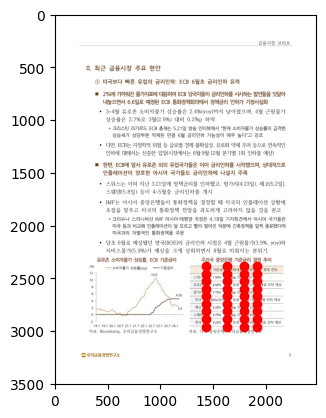

In [51]:
res=[]
for table in tables:
    # plots = camelot.plot(table, kind='contour')
    plots = camelot.plot(table, kind='joint')
    print("text extraction result\n",table.df)
    res.append(table.df.values.tolist())
    print("table detection result\n")
    plots.show()

In [48]:
for table in tables:
    print(table.df[0][0])
    print(table._bbox)


(77.25403225806451, 226.26619115549215, 517.5060483870968, 683.8373751783167)


In [26]:
import pdfplumber
def convert_camelot_to_pdfplumber(camelot_bbox, page_height, page_width):
    x1, y1, x2, y2 = camelot_bbox
    
    # 스케일링 팩터 계산 (camelot이 72 DPI 기준이라고 가정하고)
    scale_factor = page_width / 612  # 612: A4 너비의 포인트 값
    
    # 좌표 변환 및 스케일링 적용
    new_x1 = x1 * scale_factor
    new_x2 = x2 * scale_factor
    new_y1 = page_height - (y2 * scale_factor)
    new_y2 = page_height - (y1 * scale_factor)
    
    return [round(new_x1), round(new_y1), round(new_x2), round(new_y2)]


with pdfplumber.open(pdf_path) as pdf:
    for page_num, page in enumerate(pdf.pages, start=1):
        
        width = page.width
        height = page.height
        print(width, height)
        
        camelot_bbox = (73.65524193548387, 139.8867332382311, 522.7842741935484, 334.96034236804564)
        
        pdfplumber_bbox = convert_camelot_to_pdfplumber(camelot_bbox, height, width)
        print(f"Converted bbox: {pdfplumber_bbox}")
        
        table = page.crop(pdfplumber_bbox).extract_table()
        if table:
            print(f"Table extracted successfully on page {page_num}")
        else:
            print(f"No table found in the specified region on page {page_num}")

595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 1
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 2
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 3
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 4
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 5
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 6
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 7
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 8
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified region on page 9
595 841
Converted bbox: [72, 515, 508, 705]
Table extracted successfully on page 10
595 841
Converted bbox: [72, 515, 508, 705]
No table found in the specified reg

In [21]:
convert_camelot_to_pdfplumber((73.65524193548387, 139.8867332382311, 522.7842741935484, 334.96034236804564),841)

[74, 506, 523, 701]

In [37]:
def convert_pdfplumber_to_camelot(pdfplumber_bbox, page_height):
    """
    pdfplumber의 bbox를 camelot의 bbox로 변환합니다.
    
    :param pdfplumber_bbox: pdfplumber의 bbox (list 또는 tuple) [x1, y1, x2, y2]
    :param page_height: PDF 페이지의 높이
    :return: camelot 형식의 bbox (tuple) (x1, y1, x2, y2)
    """
    x1, y1, x2, y2 = pdfplumber_bbox
    
    # x 좌표 변환 (약간의 스케일링 적용)
    scale_x = 1.00125  # x 좌표에 대한 스케일 팩터
    new_x1 = x1 * scale_x
    new_x2 = x2 * scale_x
    
    # y 좌표 변환
    scale_y = 0.8904  # y 좌표에 대한 스케일 팩터
    offset_y = 8  # y 좌표에 대한 오프셋
    new_y1 = (page_height - y2) * scale_y + offset_y
    new_y2 = (page_height - y1) * scale_y + offset_y
    
    return (new_x1, new_y1, new_x2, new_y2)


In [38]:
convert_pdfplumber_to_camelot([73.0, 493.0, 523.0, 711.0],841)

(73.09125, 123.752, 523.65375, 317.8592)

In [44]:
diff= abs(int(73.65524193548387)-int(73.09125))
diff

0

In [41]:
def convert_pdfplumber_to_camelot(pdfplumber_bbox, page_height):
    new_x1, new_y1, new_x2, new_y2 = pdfplumber_bbox
    
    # 좌표 변환 (스케일링 없이 단순히 y축만 반전)
    x1 = new_x1
    x2 = new_x2
    y1 = page_height - new_y2
    y2 = page_height - new_y1
    
    return [x1, y1, x2, y2]
convert_pdfplumber_to_camelot([77.0, 620.0, 207.0, 630.0],841)

[77.0, 211.0, 207.0, 221.0]

In [ ]:
# page별로 camelot 돌기기
# camlot page와 bbpx 정보 일지할 경우 text 변경하기 

